# Pisos en venta en Alicante

<table align="left">
    <td style="border: 0px">
        <a href="https://colab.research.google.com/github/edu9as/alicante/blob/main/projects/inmobiliaria/Pisos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir En Colab"/></a>
    </td>
</table>

Este notebook tiene como objetivo explorar y analizar un conjunto de datos de pisos en venta en Alicante. El conjunto de datos contiene información valiosa como el precio, la localidad, el número de habitaciones, el número de aseos y el área de las viviendas. A través del análisis de estos datos, podremos identificar patrones y tendencias en el mercado inmobiliario de Alicante, así como detectar áreas donde la demanda de viviendas es más alta y los precios son más elevados. Este análisis puede ser útil para compradores de viviendas, promotores y constructores, y también para el Ayuntamiento de Alicante en la toma de decisiones relacionadas con la planificación urbana.

In [ ]:
!git clone https://github.com/edu9as/alicante.git && ln -s /content/alicante/datasets ../../datasets

Comencemos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = "../../datasets/pisos/"

## Viviendas en venta en Alicante y Marina Baja en febrero de 2023

Los datos recopilados acerca de las viviendas en venta tienen los siguientes campos:

* Link a la vivienda en venta: Este campo contiene el enlace web a la página donde se puede encontrar más información sobre la vivienda en venta.
* Nombre de la vivienda en venta: Este campo indica el nombre o título que se le ha dado a la vivienda en venta.
* Precio: Este campo indica el precio en euros de la vivienda en venta.
* Localidad: Este campo indica la ciudad o el barrio en el que se encuentra la vivienda en venta.
* Descripción: Este campo contiene una descripción detallada de la vivienda en venta, que puede incluir información sobre la ubicación, las características, las condiciones y otros detalles relevantes.
* Número de habitaciones: Este campo indica el número de habitaciones que tiene la vivienda en venta, incluyendo dormitorios y cualquier otra habitación utilizable como tal.
* Número de aseos: Este campo indica el número de aseos o baños que tiene la vivienda en venta.
* Área: Este campo indica la superficie total de la vivienda en metros cuadrados.

In [2]:
pisos_febrero = pd.read_csv(DATA_DIR + "2023_02.csv")
print("Hay {} viviendas en venta, con {} campos de datos cada una.".format(*pisos_febrero.shape))
pisos_febrero.head()

Hay 7682 viviendas en venta, con 11 campos de datos cada una.


,link,price,name,location,features,description,store,city,rooms,wc,area
0,https://www.pisos.com/comprar/chalet-aigues_ce...,530.000,"Chalet en calle Partida Las Eras, nº 1",Aigües,"['4 habs.', '3 baños', '339 m²']",Se vende casa señorial en parcela de 11.500m² ...,NaN,Aigues,4,3,339
1,https://www.pisos.com/comprar/casa-aigues_cent...,110.000,Casa en Aigües,Aigües,"['5 habs.', '2 baños', '205 m²']",Casa de pueblo en zona centrica. Dos plantas c...,https://www.pisos.com/microsite-inmobiliaria_2...,Aigues,5,2,205
2,https://www.pisos.com/comprar/casa-aigues_cent...,196.999,Casa en Aigües,Aigües,"['3 habs.', '3 baños', '186 m²']",Bonito chalet reformado con terreno en la mont...,https://www.pisos.com/microsite-alcaraz_inmobi...,Aigues,3,3,186
3,https://www.pisos.com/comprar/chalet-aigues_ce...,895.000,Chalet en Aigües,Aigües,"['3 habs.', '2 baños', '320 m²']",Espectacular finca a un paso del mar\nOs prese...,https://www.pisos.com/microsite-engel_and_volk...,Aigues,3,2,320
4,https://www.pisos.com/comprar/apartamento-aigu...,84.000,Apartamento en Aigües,Aigües,"['3 habs.', '2 baños', '105 m²']",Apartamento con gran solárium en el centro del...,https://www.pisos.com/microsite-inmobiliaria_2...,Aigues,3,2,105


### Tipo de vivienda

De entre todas estas viviendas, ¿qué grandes tipos de viviendas distinguimos? ¿Cuántas viviendas en venta hay de cada tipo?

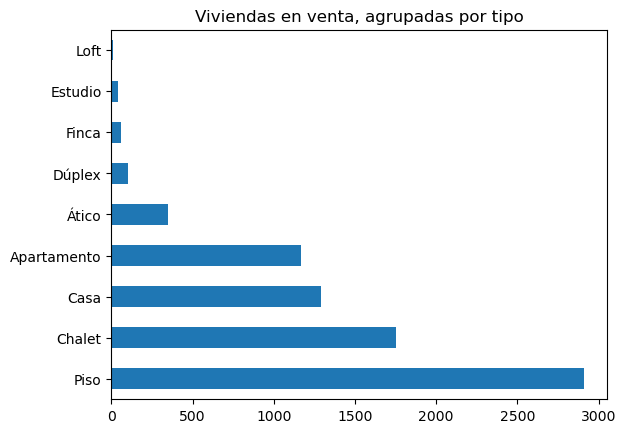

In [3]:
pisos_febrero["tipo"] = pisos_febrero.name.apply(lambda x: x.split()[0])

ax = pisos_febrero.tipo.value_counts().plot.barh()
ax.set_title("Viviendas en venta, agrupadas por tipo")
plt.show()

Casi la mitad de las viviendas en venta se engloban dentro de la categoría "Piso". También hay muchos chalets, casas y apartamentos.

¿Cuál es el precio medio para cada uno de estos tipos de vivienda?

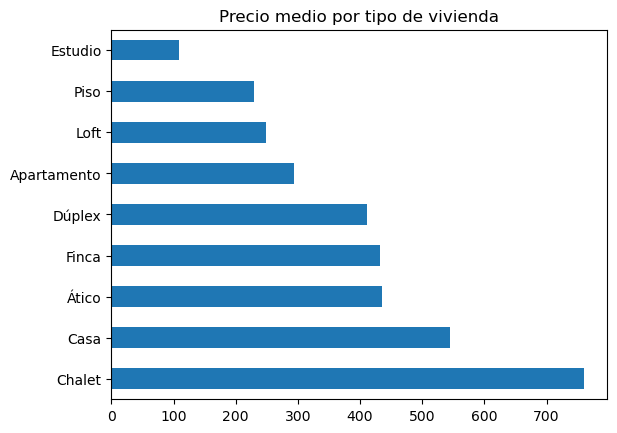

In [4]:
ax = pisos_febrero.groupby("tipo").agg({"price": np.mean}).sort_values("price", ascending = False).plot.barh(legend = None)
ax.set_title("Precio medio por tipo de vivienda")
ax.set_ylabel("")
plt.show()

Como era de esperar, el tipo de vivienda más caro (de media) es el chalet. El precio medio de este tipo de viviendas está por encima de los 700000 euros. Por el contrario, el tipo de vivienda más barata es el estudio, con un valor medio cercano a 100000 euros.

### Efecto de diversas características en el precio de la vivienda

Los tres gráficos de puntos que has realizado, habitaciones vs precio, aseos vs precio y área vs precio, son muy importantes para entender la relación entre el precio de las viviendas en venta en Alicante y sus características principales.

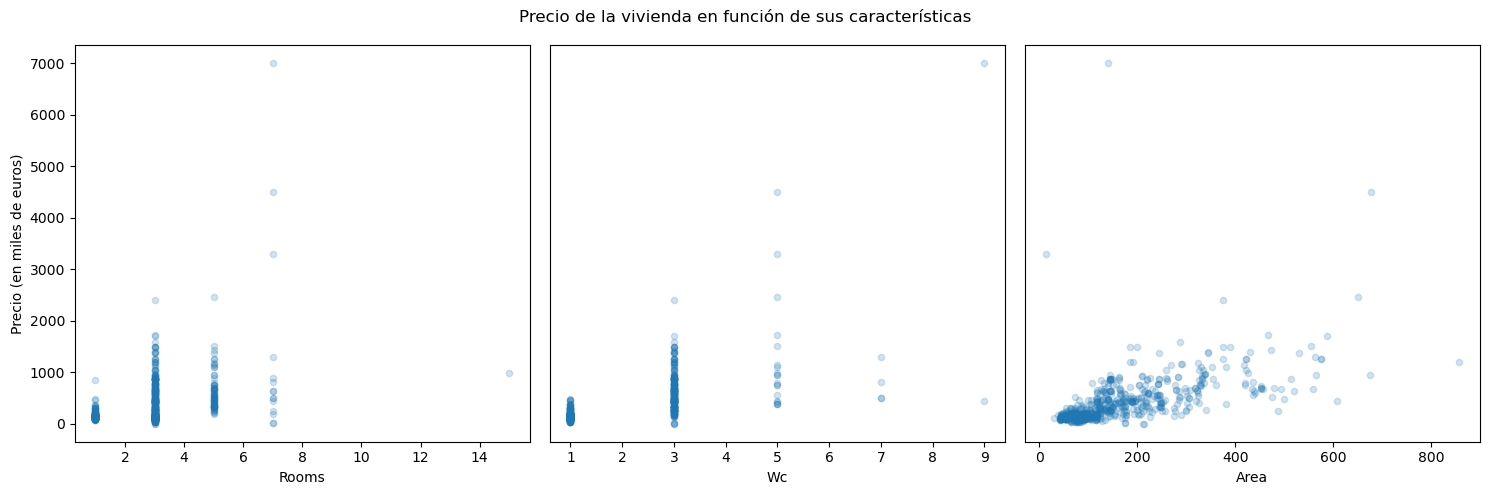

In [5]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

df = pisos_febrero[(pisos_febrero.rooms < 40) & (pisos_febrero.wc < 30) & (pisos_febrero.area < 1e4) & (pisos_febrero.wc) & (pisos_febrero.rooms) & (pisos_febrero.area)]

for i,c in enumerate(["rooms", "wc", "area"]):
    df.plot.scatter(c, "price", ax = ax[i], alpha = 0.2)
    ax[i].set_ylabel("" if i else "Precio (en miles de euros)")
    ax[i].set_xlabel(c.capitalize())
    if i:
        ax[i].set_yticks([])

fig.suptitle("Precio de la vivienda en función de sus características")
fig.tight_layout()
plt.show()

* El gráfico de habitaciones vs precio muestra cómo el precio de las viviendas aumenta a medida que el número de habitaciones aumenta. Este gráfico es importante para entender cuánto se puede esperar pagar por una vivienda en función del número de habitaciones que tenga.
* El gráfico de aseos vs precio es importante para entender cómo el número de aseos influye en el precio de las viviendas en venta. Se puede observar si existe una correlación entre el precio y el número de aseos en una vivienda.
* Por último, el gráfico de área vs precio muestra cómo el precio de las viviendas aumenta a medida que la superficie de la vivienda aumenta.

No obstante, para entender mejor el efecto de estas características en el precio de la vivienda, sería buena idea ajustar estos datos con un modelo de *machine learning* de regresión lineal por ejemplo.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pisos_febrero.copy()[["rooms", "wc", "area", "price"]]

# eliminamos las filas con valores vacíos
df.dropna(inplace=True)

# definimos las características y la variable objetivo
X = df.drop(columns = ["price"])
y = df["price"]

# dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# creamos un objeto de regresión lineal
reg = LinearRegression()

# ajustamos el modelo con los datos de entrenamiento
reg.fit(X_train, y_train)

# hacemos predicciones sobre el conjunto de prueba
y_pred = reg.predict(X_test)

# evaluamos el modelo
print("Coeficientes: ", reg.coef_)
print("Intercepción: ", reg.intercept_)
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, y_pred))

Coeficientes:  [1.10324281e-01 2.01645230e+02 4.12020412e-01]
Intercepción:  -106.79217039591998
Error cuadrático medio: 123296.28
Coeficiente de determinación: 0.48


El modelo de regresión lineal entrenado tiene tres variables predictoras: el número de habitaciones, el número de aseos y el área de la vivienda. Los coeficientes del modelo indican cómo cada variable influye en el precio de la vivienda:

* El coeficiente de la variable "habitaciones" es 0.1103, lo que indica que un incremento de una unidad en el número de habitaciones se asocia con un aumento de 110 euros en el precio de la vivienda.
* El coeficiente de la variable "aseos" es 201.64, lo que sugiere que un baño extra aumenta el precio de la vivienda en más de 200 mil euros.
* El coeficiente de la variable "área" es 0.412, lo que indica que un incremento de un metro cuadrado en el área de la vivienda se asocia con un aumento de 412 euros en el precio de la vivienda.
* El valor de la intercepción (-106.792) indica el valor que tomaría el precio de la vivienda si todas las variables predictoras fueran cero. En este caso, no tiene mucho sentido práctico, pero es una propiedad del modelo.

Las métricas obtenidas por el modelo son muy malas, por lo que deberíamos tener cuidado en las conclusiones que sacamos a partir de los coeficientes anteriores. Estas métricas seguramente mejorarían si el modelo de ML aprendiese a partir de más datos o si proporcionamos mejores predictores a este modelo de ML (no hemos tenido en cuenta la ubicación de ninguna manera, algo que sin duda es relevante). Las métricas son:

* El error cuadrático medio (123296.28) es una medida del error promedio de las predicciones del modelo. En este caso, el valor es relativamente alto, lo que sugiere que el modelo no está capturando bien todas las características que influyen en el precio de la vivienda.
* El coeficiente de determinación (0.48) indica la proporción de la variación en el precio de la vivienda que es explicada por el modelo. En este caso, el valor es bajo, lo que sugiere que el modelo no está capturando bien todas las relaciones entre las variables predictoras y el precio de la vivienda.

En resumen, el modelo de regresión lineal entrenado no es muy preciso en la predicción del precio de la vivienda a partir de las variables predictoras seleccionadas. Es probable que sea necesario incluir más variables o considerar otros modelos de aprendizaje automático para mejorar la precisión de las predicciones.

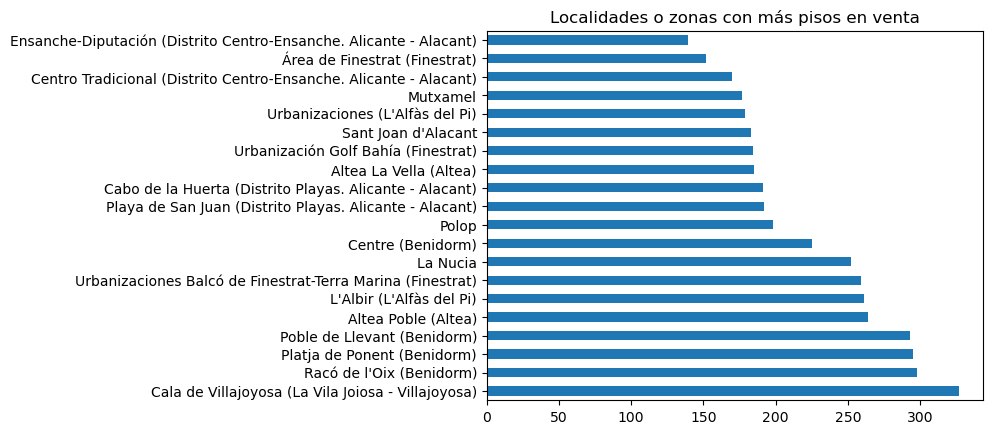

In [6]:
ax = pisos_febrero.location.value_counts().head(20).plot.barh()
ax.set_title("Localidades o zonas con más pisos en venta")
plt.show()

### Búsqueda de viviendas con características especiales

La columna "description" es una fuente valiosa de información para aquellos que buscan comprar una vivienda en Alicante. Contiene información detallada sobre las características básicas de la propiedad, más allá del número de habitaciones, el número de baños o la superficie. Al analizar esta columna, se pueden encontrar patrones y tendencias en cuanto a los requisitos y preferencias de los compradores y lo que las viviendas ofrecen, lo que puede ayudar a los agentes inmobiliarios a comprender mejor a su audiencia y a adaptar sus servicios en consecuencia.

Por otro lado, la columna "location" es especialmente importante para las búsquedas específicas y detalladas de los potenciales compradores. Permite a los usuarios buscar propiedades en áreas específicas de la ciudad, como el centro histórico, la playa o los barrios residenciales. Además, la localización es un factor clave en la fijación del precio de una propiedad, por lo que los compradores pueden utilizar esta información para hacer comparaciones y tomar decisiones informadas sobre qué propiedad comprar.

Por ejemplo, si quisiera consultar chalets en la playa de El Campello:

In [7]:
hay_descripcion = lambda x: isinstance(x.description,str)
es_chalet = lambda x: "chalet" in x.description.lower()
en_el_campello = lambda x: "El Campello Playa" in x.location

buscar_chalets_en_campello = lambda x: hay_descripcion(x) and es_chalet(x) and en_el_campello(x)

pisos_febrero[pisos_febrero.apply(buscar_chalets_en_campello, axis = 1)]

,link,price,name,location,features,description,store,city,rooms,wc,area,tipo
19,https://www.pisos.com/comprar/chalet_pareado-e...,285.0,Chalet pareado en Carrer de Santa Pola,El Campello Playa (El Campello),"['3 habs.', '2 baños', '96 m²']","Ocasión! En venta precioso chalet pareado, ubi...",https://www.pisos.com/microsite-inmo_ok_agencia/,El Campello,3,2,96,Chalet
60,https://www.pisos.com/comprar/chalet-el_campel...,520.0,Chalet en El Campello Playa,El Campello Playa (El Campello),"['3 habs.', '3 baños', '475 m²']",Chalet con vistas en coveta fuma! A 5min andan...,https://www.pisos.com/microsite-centro_de_vivi...,El Campello,3,3,475,Chalet
254,https://www.pisos.com/comprar/casa-el_campello...,1850.0,Casa en El Campello Playa,El Campello Playa (El Campello),"['5 habs.', '6 baños', '555 m²']",Amplio chalet de estilo clásico con vistas al ...,https://www.pisos.com/microsite-mar_and_golf_h...,El Campello,5,6,555,Casa
365,https://www.pisos.com/comprar/chalet-el_campel...,800.0,Chalet en El Campello Playa,El Campello Playa (El Campello),"['7 habs.', '7 baños', '437 m²']",El chalet esta a 2 minutos de la playa y super...,NaN,El Campello,7,7,437,Chalet
387,https://www.pisos.com/comprar/chalet-el_campel...,849.0,Chalet en Carrer de Sant Jordi,El Campello Playa (El Campello),"['7 habs.', '5 baños', '450 m²']",Magnifico chalet independiente frente al puert...,https://www.pisos.com/microsite-alto_inmobilia...,El Campello,7,5,450,Chalet
455,https://www.pisos.com/comprar/casa-el_campello...,900.0,Casa en El Campello Playa,El Campello Playa (El Campello),"['6 habs.', '5 baños', '300 m²']",Chalet de lujo nuevo de 300m² a un paso de la ...,NaN,El Campello,6,5,300,Casa
466,https://www.pisos.com/comprar/chalet-el_campel...,524.0,Chalet en El Campello Playa,El Campello Playa (El Campello),"['5 habs.', '6 baños', '260 m²']","Superficie total 260 m², chalet superficie úti...",NaN,El Campello,5,6,260,Chalet


## Evolución del precio con el paso del tiempo

El análisis de tablas de precios recopiladas en distintos momentos puede ser muy útil para entender la evolución de un mercado y las variaciones en los precios. En el caso de las viviendas en Alicante, esta información puede ofrecer una valiosa perspectiva sobre cómo se ha desarrollado el mercado inmobiliario en la ciudad en un periodo de tiempo determinado. Además, esta información puede ser utilizada para realizar predicciones sobre el comportamiento futuro del mercado y tomar decisiones más informadas en cuanto a la compra o venta de propiedades. En este caso, vamos a comparar los precios de las viviendas en febrero y marzo de 2023:

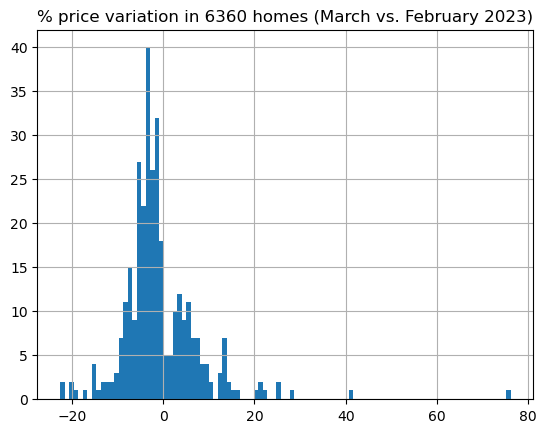

In [27]:
df = pd.merge(pd.read_csv(DATA_DIR + "2023_02.csv"), pd.read_csv(DATA_DIR + "2023_03.csv"), how="inner", on="link")

df["variation"] = df.price_y - df.price_x
df["variation_pct"] = (
    df.variation/(df.price_x + 1e-7)*100 *
    df.price_x/(df.price_x + 1e-7) * # exclude null values in Feb price
    df.price_y/(df.price_y + 1e-7) # exclude null values in Mar price
)

ax = df[(df.variation_pct != 0)].variation_pct.hist(bins = 100)

ax.set_title(f"% price variation in {df.shape[0]} homes (March vs. February 2023)")
plt.show()

En el gráfico anterior, para mejorar la visualización, se han excluido las viviendas que no han variado su precio de febrero a marzo. Aunque hay viviendas que han aumentado su valor de manera muy significativa, con valores por encima de 40% e incluso 70% en algunos casos, parece que la mayoría de las viviendas en las que el valor ha cambiado se han visto depreciadas aunque la variación no ha sido tan grande como en los casos de subidas de precio.

Las viviendas que más han disminuido su valor son:

In [23]:
show_columns = {
    "name_y": "Nombre",
    "location_y": "Ubicación",
    "variation_pct": "Variación del precio (%)",
    "variation": "Variación del precio",
    "price_y": "Precio (marzo)",
    "price_x": "Precio (febrero)",
    "features_x": "Características",
}

df.sort_values("variation_pct")[list(show_columns)].rename(columns = show_columns).head(15).round(2)

,Nombre,Ubicación,Variación del precio (%),Variación del precio,Precio (marzo),Precio (febrero),Características
678,Chalet en Urbanización Golf Bahía,Urbanización Golf Bahía (Finestrat),-22.58,-350.0,1200.0,1550.0,"['4 habs.', '4 baños', '540 m²']"
1019,Casa en Mutxamel,Mutxamel,-22.48,-29.0,100.0,129.0,"['5 habs.', '2 baños', '331 m²']"
4058,Piso en Centro,Xixona - Jijona,-20.00,-13.0,52.0,65.0,"['2 habs.', '1 baño', '102 m²', '3ª planta']"
6312,"Chalet en calle La Solana 24. Polop, nº 24",Polop,-19.75,-160.0,650.0,810.0,"['8 habs.', '5 baños', '400 m²']"
4326,Chalet en Altea Poble,Altea Poble (Altea),-19.50,-155.0,640.0,795.0,"['1 hab.', '2 baños', '216 m²']"
2909,Piso en Casco Antiguo-Santa Cruz,Casco Antiguo-Santa Cruz (Distrito Mercado-Cas...,-17.48,-180.0,850.0,1030.0,"['3 habs.', '4 baños', '200 m²']"
3503,Piso en Tómbola,Tómbola (Distrito Los Ángeles-Rabasa-San Agust...,-15.59,-18.4,99.6,118.0,"['2 habs.', '1 baño', '90 m²']"
3557,Piso en Tombola,Tómbola (Distrito Los Ángeles-Rabasa-San Agust...,-15.34,-18.1,99.9,118.0,"['2 habs.', '1 baño', '90 m²', '3ª planta']"
2563,Piso en Centro Tradicional,Mercado (Distrito Mercado-Casco Antiguo. Alica...,-15.09,-40.0,225.0,265.0,"['3 habs.', '2 baños', '124 m²', '3ª planta']"
5481,Chalet en La Nucia,Urbanizaciones (L'Alfàs del Pi),-14.71,-125.0,725.0,850.0,"['4 habs.', '3 baños', '280 m²']"


Viviendas que han aumentado más su precio:

In [25]:
df.sort_values("variation_pct")[list(show_columns)].rename(columns = show_columns).tail(15).round(2)

,Nombre,Ubicación,Variación del precio (%),Variación del precio,Precio (marzo),Precio (febrero),Características
5104,Casa en La Torre de les Maçanes - Torremanzanas,La Torre de les Maçanes - Torremanzanas,13.62,12.3,102.6,90.3,"['3 habs.', '3 baños', '116 m²']"
1401,Piso en Benidorm,Poble de Llevant (Benidorm),13.64,27.0,225.0,198.0,"['2 habs.', '2 baños', '116 m²', '2ª planta']"
2839,Casa pareada en calle del Océano,L'Albufereta (Distrito Playas. Alicante - Alac...,14.50,145.0,1145.0,1000.0,"['8 habs.', '8 baños', '423 m²']"
2430,Casa adosada en calle del Océano,Cabo de la Huerta (Distrito Playas. Alicante -...,14.90,149.0,1149.0,1000.0,"['8 habs.', '7 baños', '406 m²']"
331,Chalet en La Almadraba-Coveta Fumà-Amerador,La Almadraba-Coveta Fumà-Amerador (El Campello),15.38,100.0,750.0,650.0,"['5 habs.', '4 baños', '230 m²']"
4494,Dúplex en Casco Antiguo,Altea Poble (Altea),16.67,30.0,210.0,180.0,"['2 habs.', '2 baños', '95 m²', '1ª planta']"
2747,Piso en calle de Castaños,Casco Antiguo-Santa Cruz (Distrito Mercado-Cas...,20.52,31.5,185.0,153.5,"['2 habs.', '1 baño', '70 m²', '1ª planta']"
1202,Chalet en Poble de Llevant,Poble de Llevant (Benidorm),20.97,130.0,749.9,619.9,"['3 habs.', '3 baños', '224 m²']"
585,Chalet en Urbanización Golf Bahía,Urbanización Golf Bahía (Finestrat),20.97,130.0,749.9,619.9,['224 m²']
713,Chalet en Carrer Paris,Urbanización Golf Bahía (Finestrat),22.76,165.0,890.0,725.0,"['3 habs.', '3 baños', '244 m²']"


En este notebook se han analizado datos de pisos en venta en Alicante. Estos datos proporcionan información muy valiosa para entender el mercado inmobiliario de la ciudad que permiten tomar decisiones informadas. La información recopilada puede ayudar a personas a encontrar su hogar ideal y a inversores a identificar oportunidades valiosas en el mercado.

Además, este tipo de análisis puede tener un gran impacto en la ciudad de Alicante del futuro. Por ejemplo, los datos pueden ser utilizados por planificadores urbanos para identificar patrones de desarrollo en la ciudad, por empresas de construcción para adaptar sus proyectos a las necesidades de los compradores, y por los responsables de políticas para entender el mercado inmobiliario y promover el acceso a la vivienda asequible para todos los habitantes de la ciudad.

En definitiva, el uso inteligente de los datos es una herramienta clave para construir una Alicante más sostenible, equitativa y próspera. Al continuar recopilando y analizando datos de diferentes sectores de la ciudad, podemos generar nuevas ideas, soluciones y mejoras para la comunidad en su conjunto.